See for more details: http://localhost:7227/notebooks/notebooks/CICLAD/LMDZ_grid/orography_comparison_phis.ipynb

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 95 GB / percent used: 24.1 %


# Get orography from the variables phis

In [4]:
# Just to get a "normal" grid
relief_CMIP6 = xr.open_dataarray('/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/orog/gr/latest/orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').load()

In [5]:
def get_topo(grilles_gcm_path, topo_CMIP6):
    phis = xr.open_dataset(grilles_gcm_path).phis
    topo = topo_CMIP6.copy()
    topo.values = phis[:,:-1].roll(lonv=int(topo_CMIP6.lon.size/2), roll_coords=True).sortby('latu').values
    return topo

In [9]:
relief_def = get_topo('/data/mlalande/ELC-144x142x79_clim/Output/Grid/ELC-144x142x79_grilles_gcm.nc', relief_CMIP6)
relief_GMTED2010_00625deg = get_topo('/data/mlalande/ELC-144x142x79-GMTED2010-00625deg/ATM/Output/Grid/ELC-144x142x79-GMTED2010-00625deg_grilles_gcm.nc', relief_CMIP6)

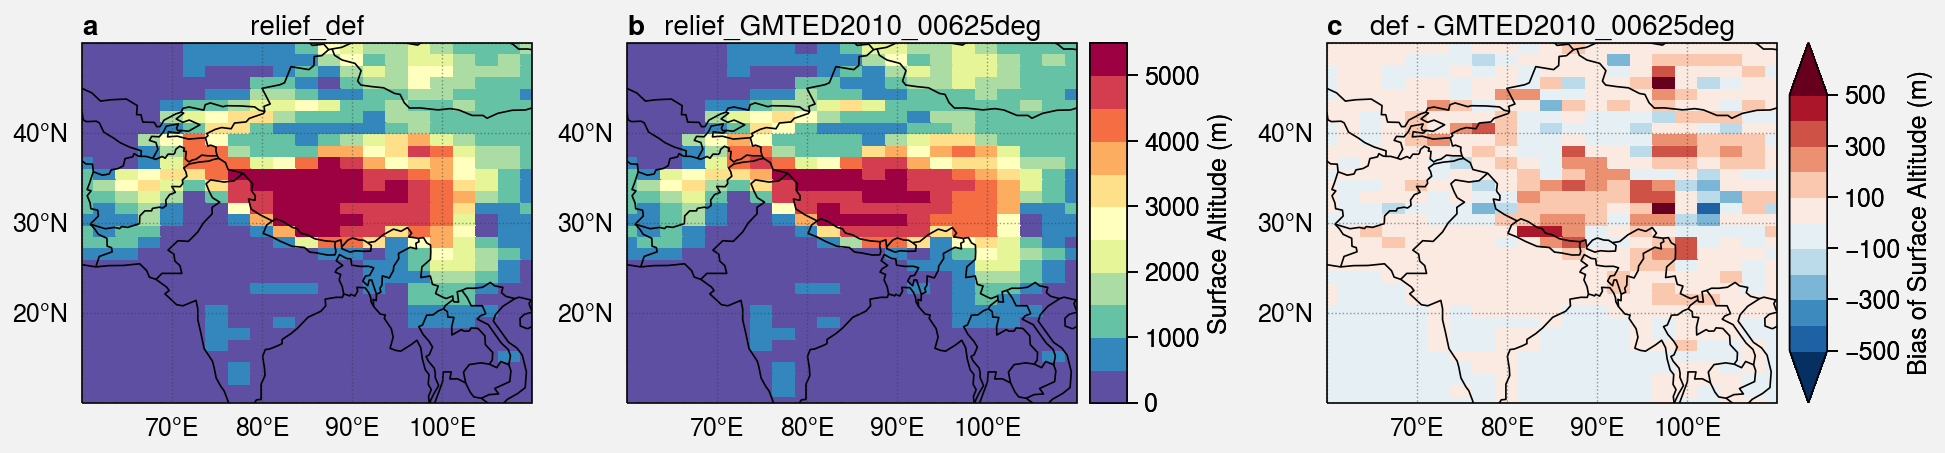

In [30]:
levels=plot.arange(0,5500,500)
cmap='Spectral'
extend='neither'

levels_bias=plot.arange(-500,500,100)
cmap_bias='BuRd'
extend_bias='both'

f, axs = plot.subplots(proj='cyl', ncols=3, nrows=1)

axs[0].pcolormesh(relief_def.sel(lat=slice(10,50), lon=slice(60,110)), levels=levels, cmap=cmap, extend=extend)
axs[0].format(title='relief_def')

axs[1].pcolormesh(relief_GMTED2010_00625deg.sel(lat=slice(10,50), lon=slice(60,110)), levels=levels, cmap=cmap, extend=extend, colorbar='r')
axs[1].format(title='relief_GMTED2010_00625deg')

m = axs[2].pcolormesh((relief_def-relief_GMTED2010_00625deg).sel(lat=slice(10,50), lon=slice(60,110)), levels=levels_bias, cmap=cmap_bias, extend=extend_bias)
axs[2].format(title='def - GMTED2010_00625deg')
axs[2].colorbar(m, label='Bias of Surface Altitude (m)')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    borders=True, coast=True, abc=True,
    lonlines=10, latlines=10, latlim=(10,50), lonlim=(60,110)
)

f.savefig('img/compare_topography.pdf')
f.savefig('img/compare_topography.png')
f.savefig('img/compare_topography.jpg')